In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *


center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }

COLOR_BLUE=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
COLOR_RED=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
COLOR_DGREEN=plt.rcParams['axes.prop_cycle'].by_key()['color'][3]



In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
np.sort(df.e_sector.unique())

array([1, 2, 3, 4, 5, 6])

In [4]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi,pip_theta_star,pip_phi_star
0,1,2.529223,0.385549,1.416614,-1,NaN,NaN,NaN,NaN,NaN
1,1,1.059415,0.615729,1.266920,-1,NaN,NaN,NaN,NaN,NaN
2,4,0.624542,0.732910,-1.264343,-1,NaN,NaN,NaN,NaN,NaN
3,3,0.473490,0.746808,-0.234823,-1,NaN,NaN,NaN,NaN,NaN
4,4,2.130505,0.480604,-1.656265,2,1.460415,0.551223,0.752219,1.193524,4.441669


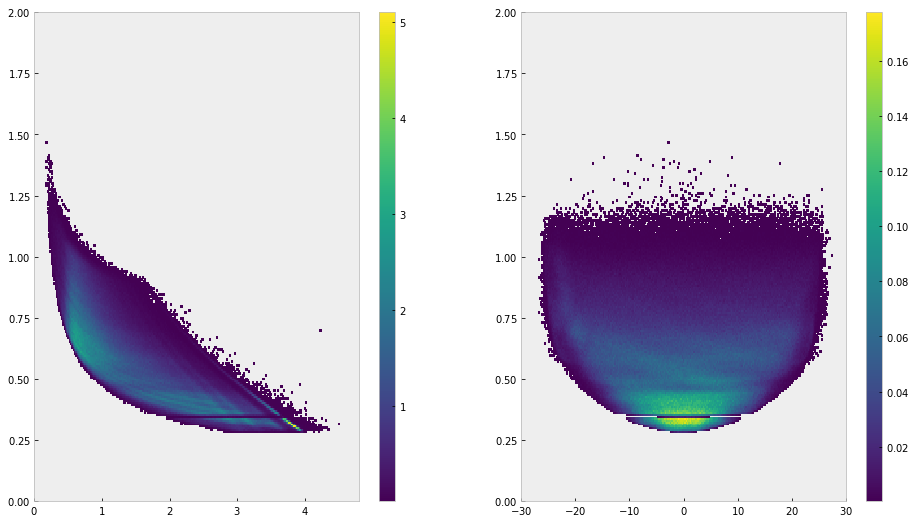

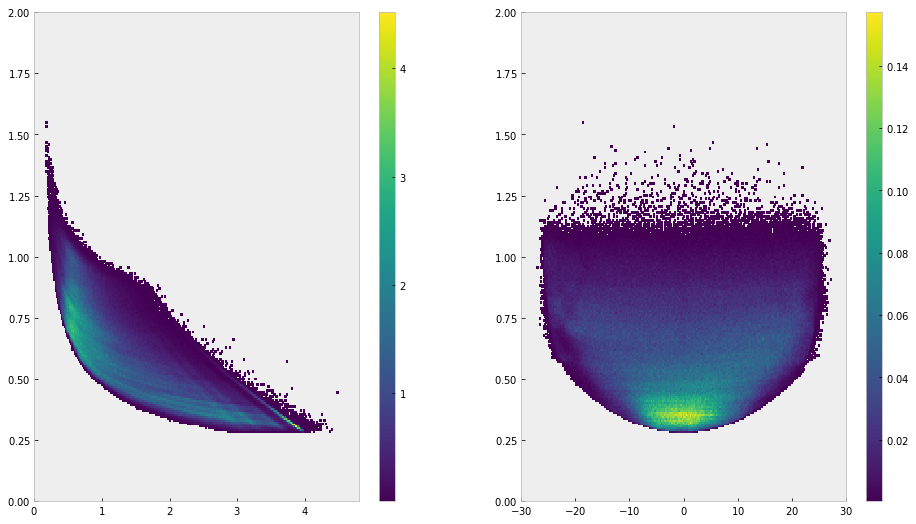

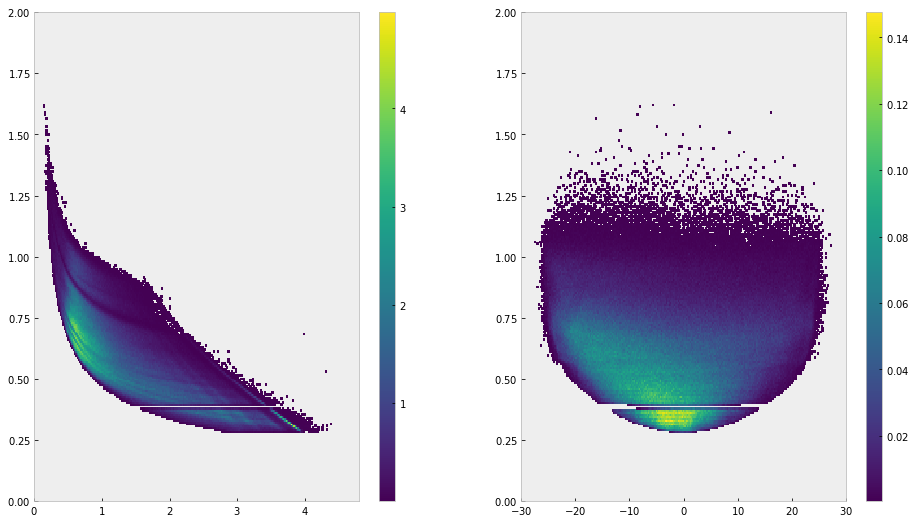

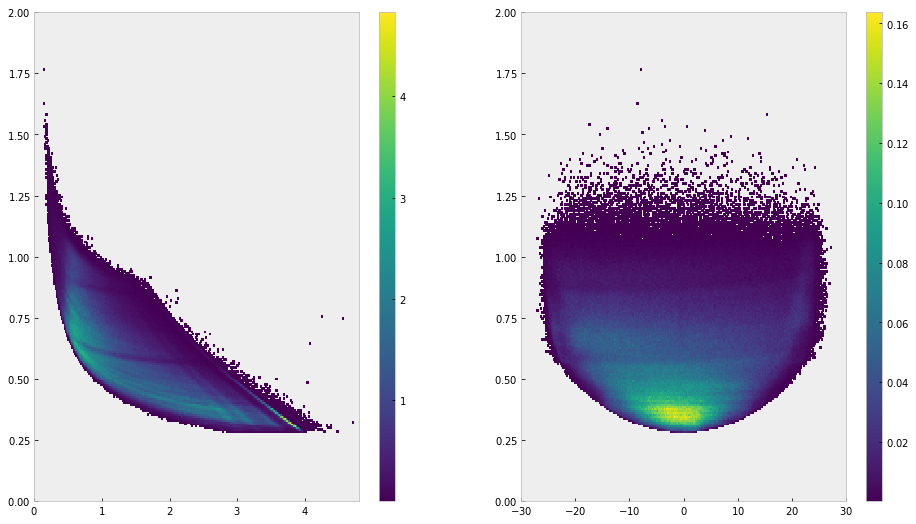

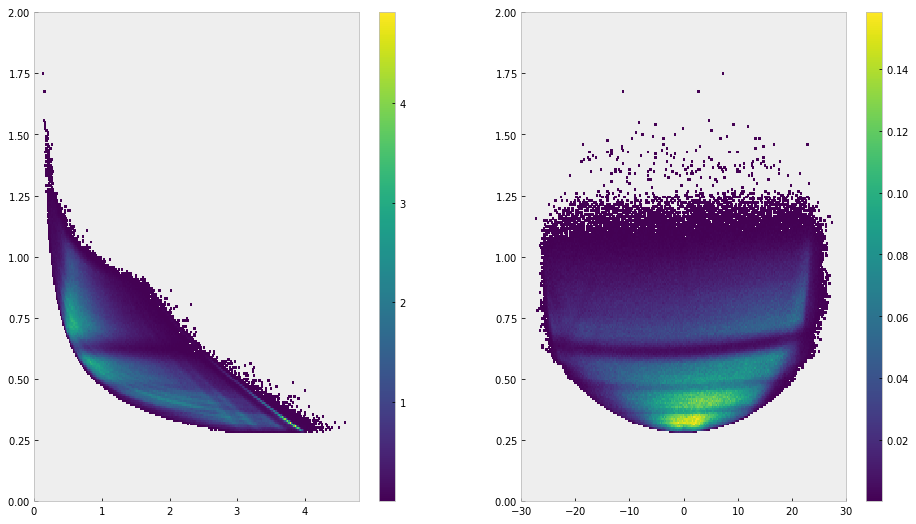

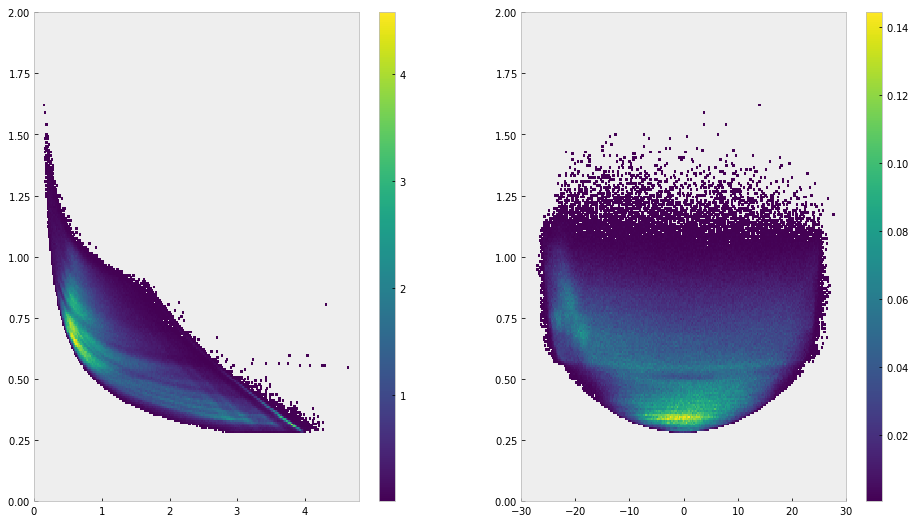

In [5]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    _df = df[df.e_sector == sec]
    eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                        xbins=250, ybins=250, xrange=[-30,30], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

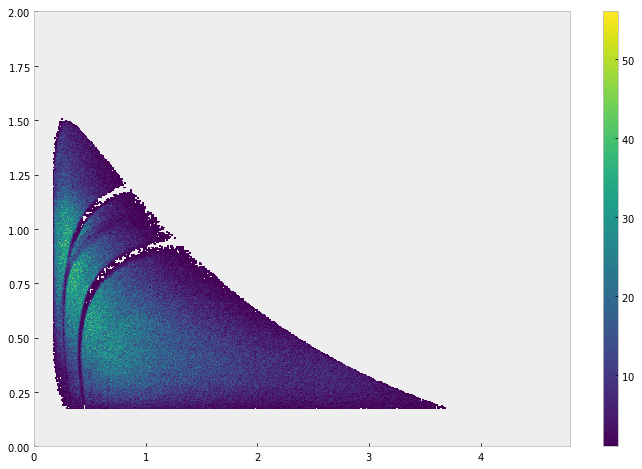

In [6]:
def line(xs, c):
    return c[0] + c[1]*xs + (c[2]/xs) * ( 1-np.exp(-c[3]*( c[4] + c[5]*xs + (c[6]/xs))))

c = np.array([1,1,1,1,1,1,1])

for sec in [1]:
    fig, ax = plt.subplots(figsize=[12,8])
    _df = df[df.pip_sector == sec]
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=500, ybins=500, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(zeros=False, density=False)
    
    ps = np.linspace(0, 4.8, 500)
    
    # plt.plot(ps, line(ps,c))
    plt.show()

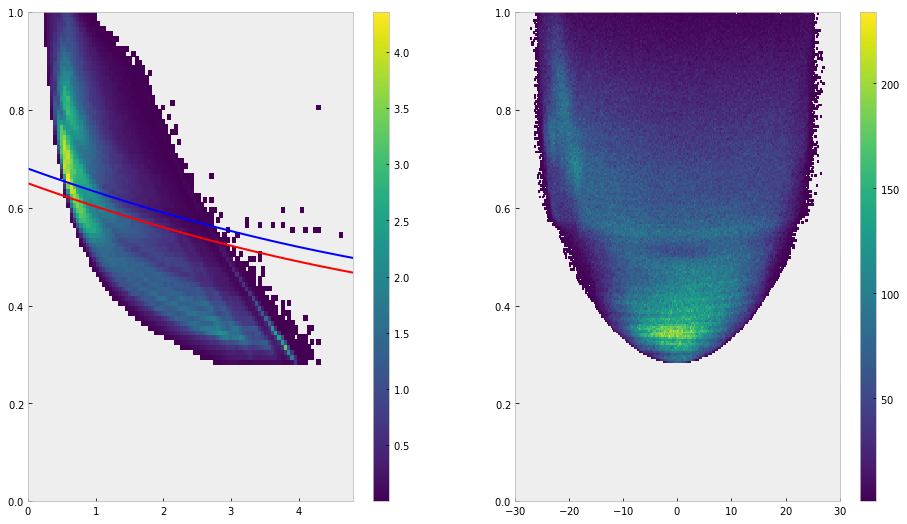

In [7]:
def cut_line(xs, a, b, c, d):
    return a*xs**2 + b*xs + c 

sec = 6
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(0.001, 4.8, len(_df))

pa=0.0025
pb=-0.05
pc=0.68
pd=0
ax[0].plot(ps,cut_line(ps,pa,pb,pc,pd), c='b')

ma=0.0025
mb=-0.05
mc=0.65
md=0
ax[0].plot(ps, cut_line(ps,ma,mb,mc,md), c='r')

cut = ~(~(_df.e_theta < cut_line(ps,pa,pb,pc,pd)) & ~(_df.e_theta > cut_line(ps,ma,mb,mc,md)))

_df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=100, ybins=100, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
epphitheta.plot(ax[1], density=False, zeros=False)
plt.show()


plt.show()

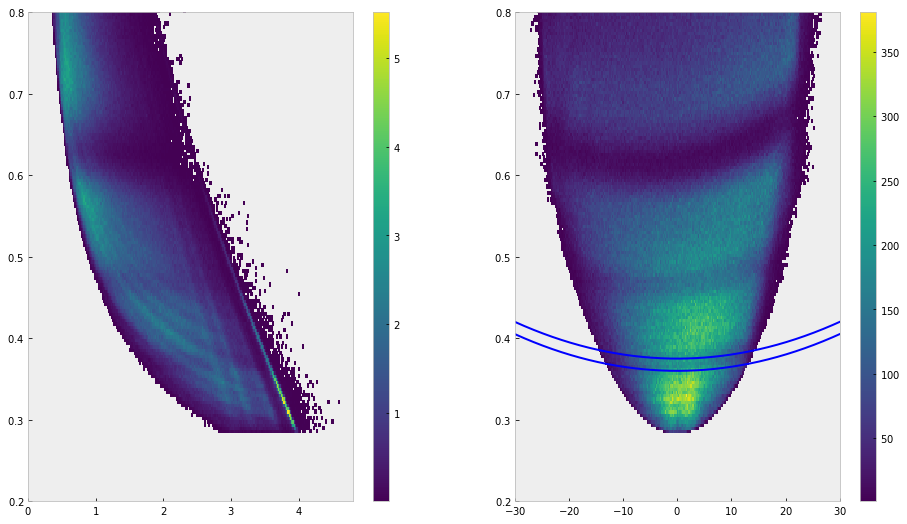

In [8]:
def line(xs, c):
    return c[2] + c[1]*xs + c[0]*xs**2

# sec = 1
# c0 = [-0.000045, 0.0, 0.345] 
# c1 = [0.000045, 0.0, 0.355] 

# sec = 3
# c0 = [-0.00002, 0.0003, 0.38] 
# c1 = [0.000045, 0.0, 0.395] 

sec = 5
c0 = [0.00006, 0.0005, 0.59]
c1 = [0.00005, 0.0006, 0.65]

c0 = [0.00008, 0.0005, 0.456]
c1 = [0.00008, 0.0005, 0.48]

c0 = [0.00005, 0.0000, 0.36]
c1 = [0.00005, 0.0000, 0.375]

# sec = 5
# c0 = [0.00005, 0.0000, 0.36]
# c1 = [0.00005, 0.0000, 0.375]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(-30, 30, len(_df))


cut = (~(_df.e_theta < line(_df.e_phi, c0)) & ~(_df.e_theta > line(_df.e_phi, c1)))

#_df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
epphitheta.plot(ax[1], density=False, zeros=False)

ax[0].set_ylim(0.2,0.8)
ax[1].set_ylim(0.2,0.8)


#c0 = [-0.00002, 0.0003, 0.38] 
#c1 = [0.000045, 0.0, 0.395] 
ax[1].plot(ps, line(ps, c0), c='b')
ax[1].plot(ps, line(ps, c1), c='b')


plt.show()

In [9]:
# width = 0.5
# momentums = np.arange(0.2, 4, width)
# print(momentums)
# sec = 2
# for p in momentums:
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
#     _df = df[(df.e_sector == sec) & (df.e_p > p) & (df.e_p < p+width)]
#     eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
#     eptheta.plot(ax[0], zeros=False)
    
#     epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
#                         xbins=250, ybins=250, xrange=[-30,30], yrange=[0,2])
#     epphitheta.plot(ax[1], zeros=False)
#     plt.show()

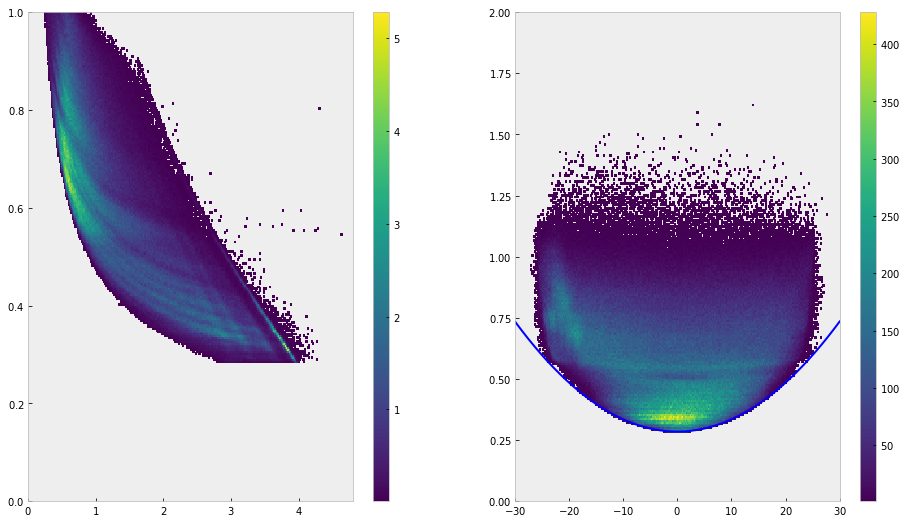

In [10]:
def line(xs, c):
    return c[2] + c[1]*xs + c[0]*xs**2 
sec = 3
c0 = [0.0005, 0.0, 0.285]


sec = 6
c0 = [0.0005, 0.0, 0.285]



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(-30, 30, len(_df))




# c2 = [0, 0,0,0,0,0,0]
# ax[0].plot(ps, line(ps, c2), c='r')

cut =  _df.e_theta > line(np.rad2deg(_df.e_phi)+center_phi[sec], c0)

_df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,2])
epphitheta.plot(ax[1], density=False, zeros=False)

#ax[0].set_ylim(0.2,0.8)
#ax[1].set_ylim(0.2,0.8)


  
ax[1].plot(ps, line(ps, c0), c='b')
#ax[1].plot(np.rad2deg(_df.e_phi)+center_phi[sec], line(np.rad2deg(_df.e_phi)+center_phi[sec], c0), c='b')



plt.show()

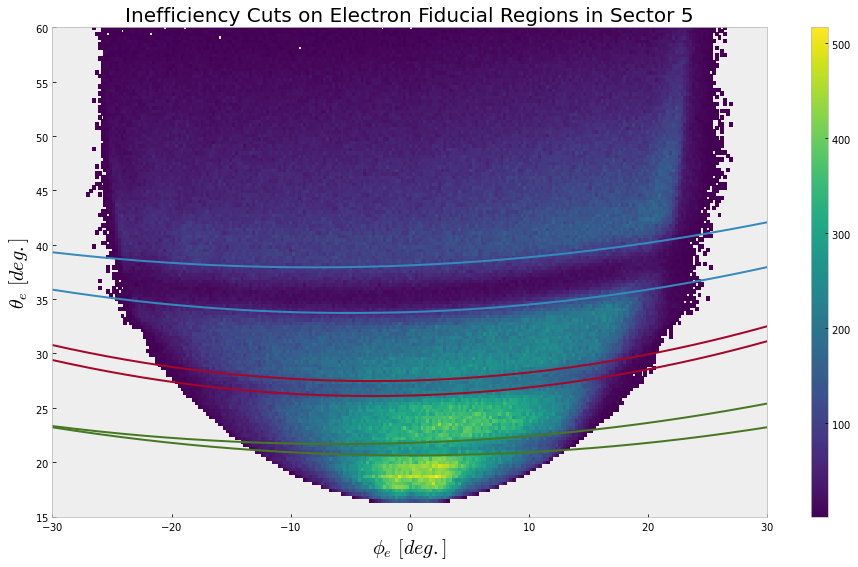

In [11]:
def line(xs, c):
    return c[2] + c[1]*xs + c[0]*xs**2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[16,9])
sec = 5
_df = df[df.e_sector == sec]

ps = np.linspace(-30, 30, len(_df))

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=np.rad2deg(_df.e_theta), 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,80])
epphitheta.plot(ax, density=False, zeros=False)

ax.set_ylim(15,60)


c0 = [0.00006, 0.0006, 0.59]
c1 = [0.00005, 0.0008, 0.665]
ax.plot(ps, np.rad2deg(line(ps, c0)), c=COLOR_BLUE)
ax.plot(ps, np.rad2deg(line(ps, c1)), c=COLOR_BLUE)

c0 = [0.00008, 0.0005, 0.456]
c1 = [0.00008, 0.0005, 0.48]
ax.plot(ps, np.rad2deg(line(ps, c0)), c=COLOR_RED)
ax.plot(ps, np.rad2deg(line(ps, c1)), c=COLOR_RED)

c0 = [0.00005, 0.0000, 0.36]
c1 = [0.00005, 0.0006, 0.38]
ax.plot(ps, np.rad2deg(line(ps, c0)), c=COLOR_DGREEN)
ax.plot(ps, np.rad2deg(line(ps, c1)), c=COLOR_DGREEN)

plt.title("Inefficiency Cuts on Electron Fiducial Regions in Sector 5")
plt.xlabel("$\phi_e~[deg.]$")
plt.ylabel("$\\theta_e~[deg.]$")

plt.show()

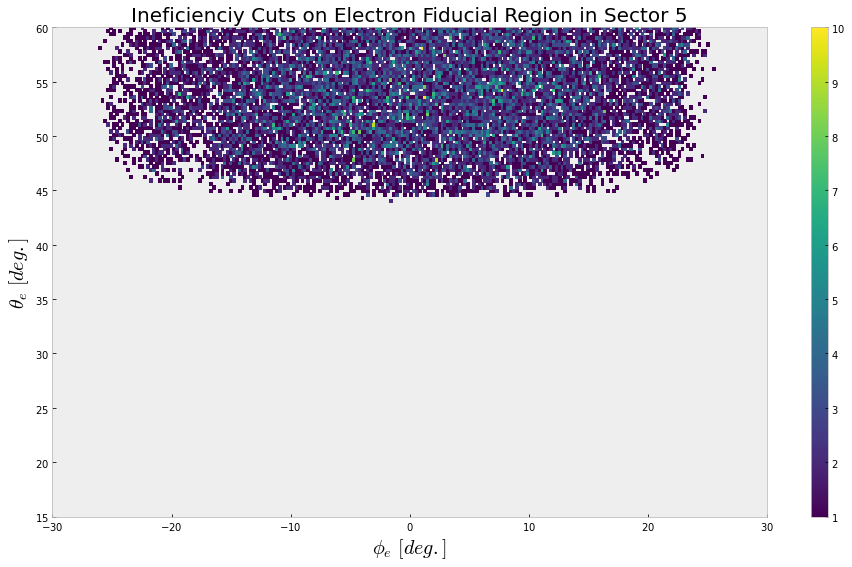

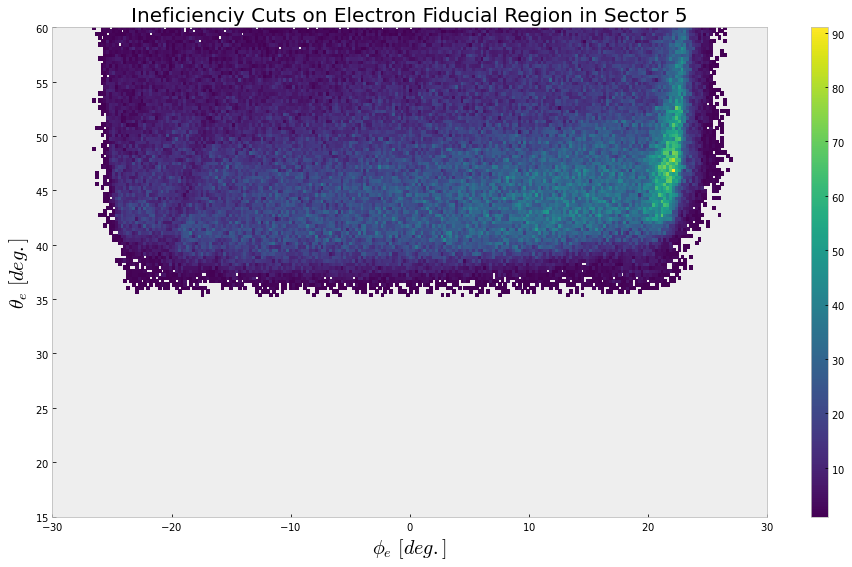

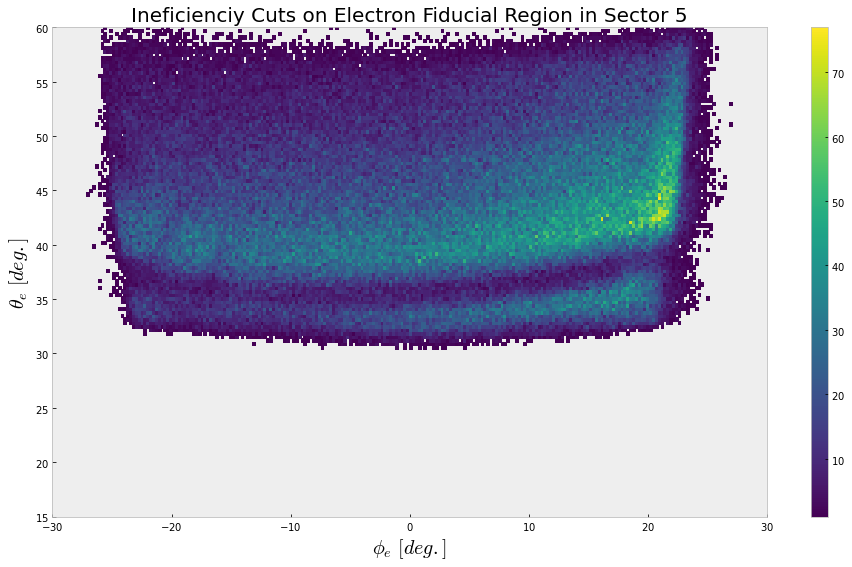

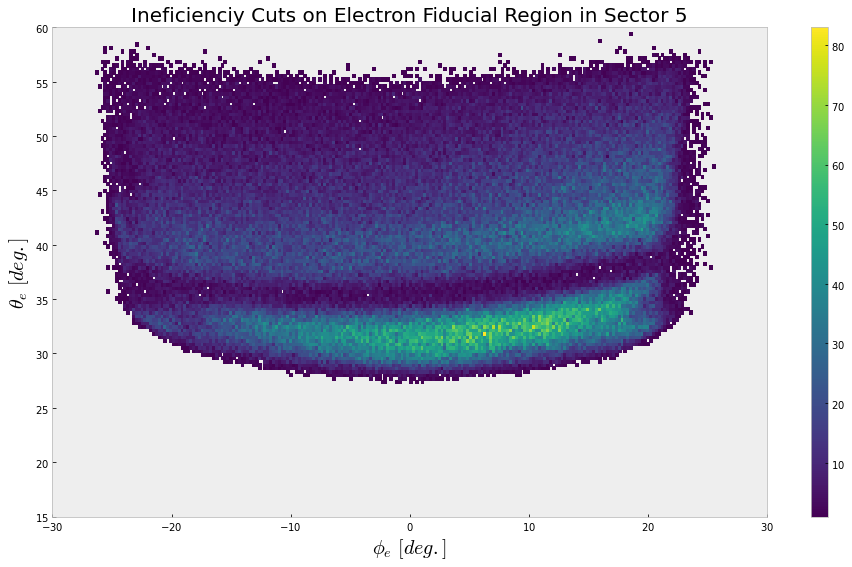

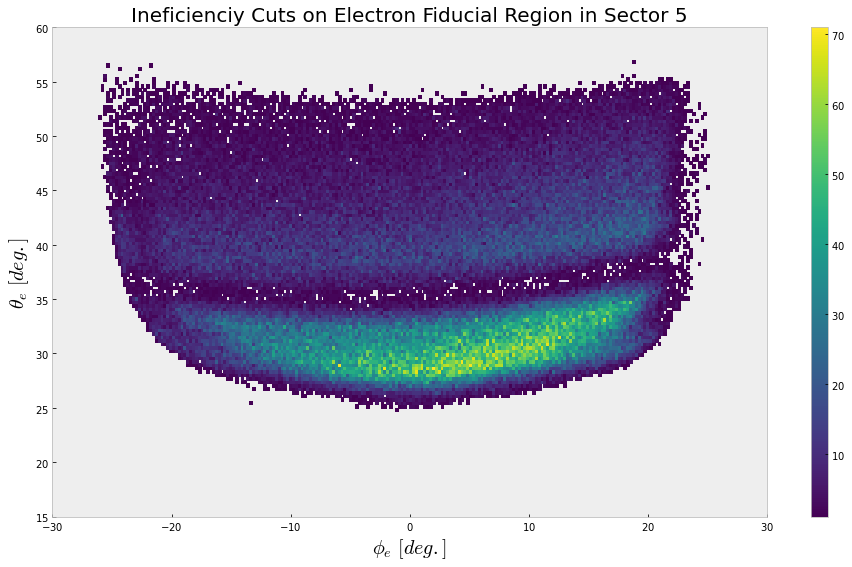

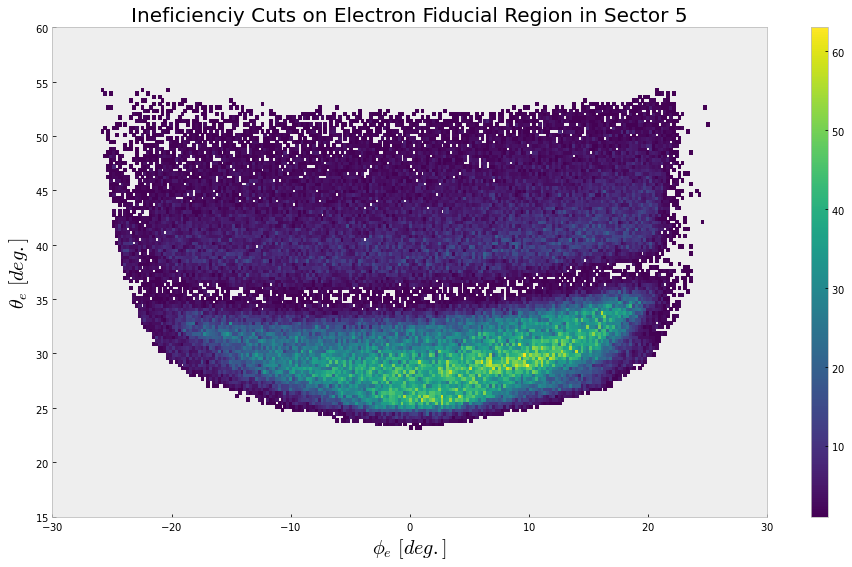

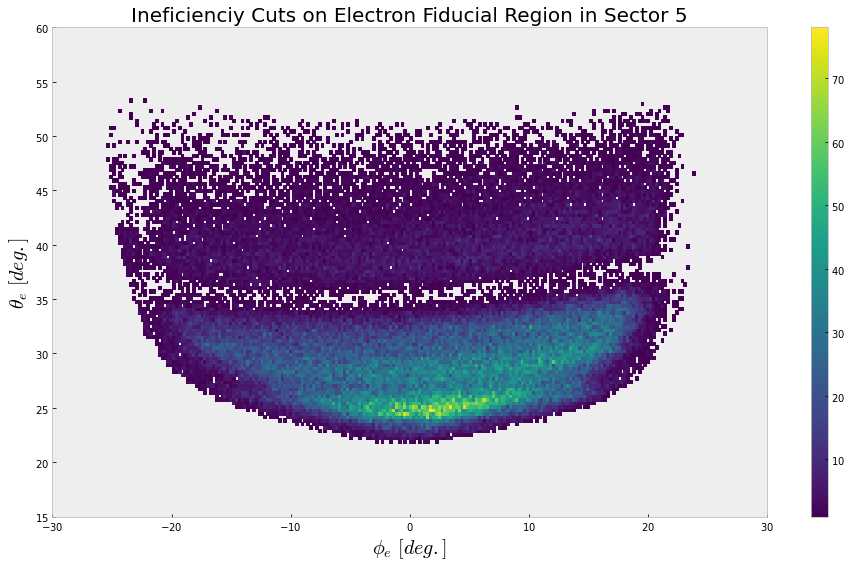

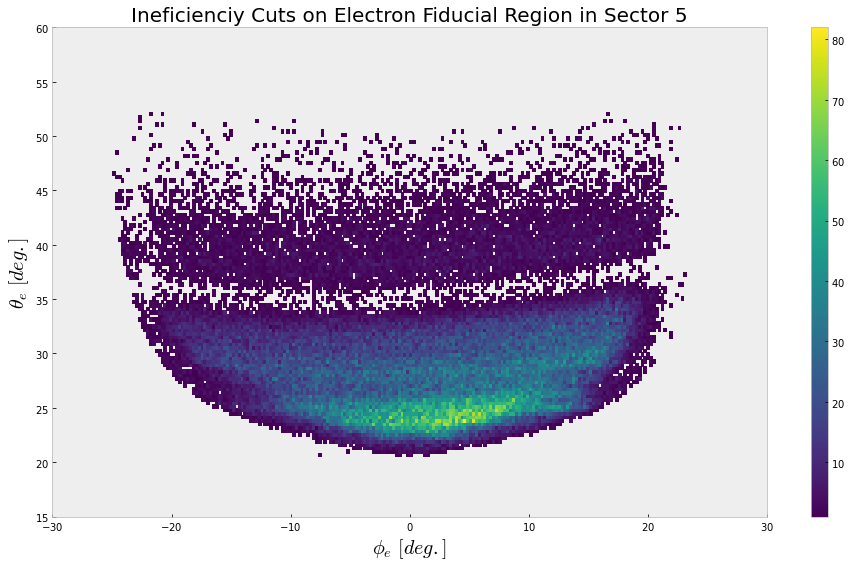

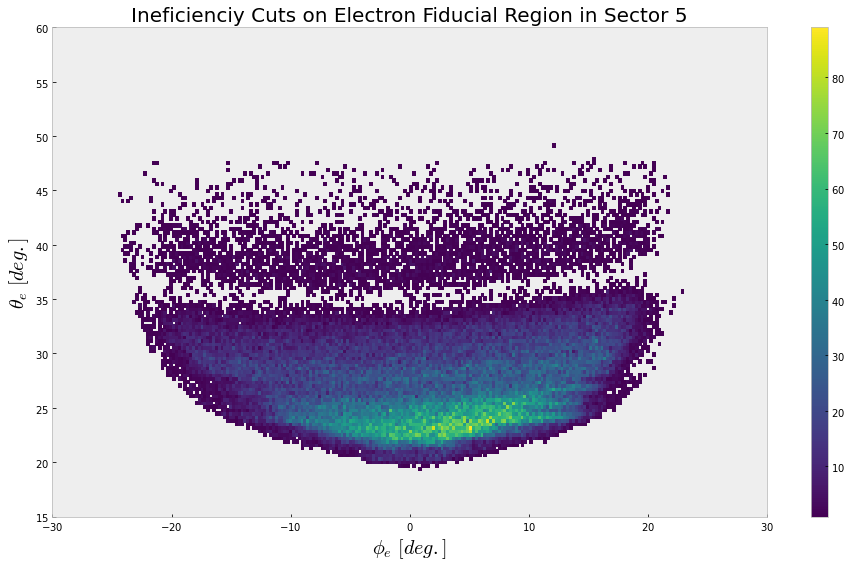

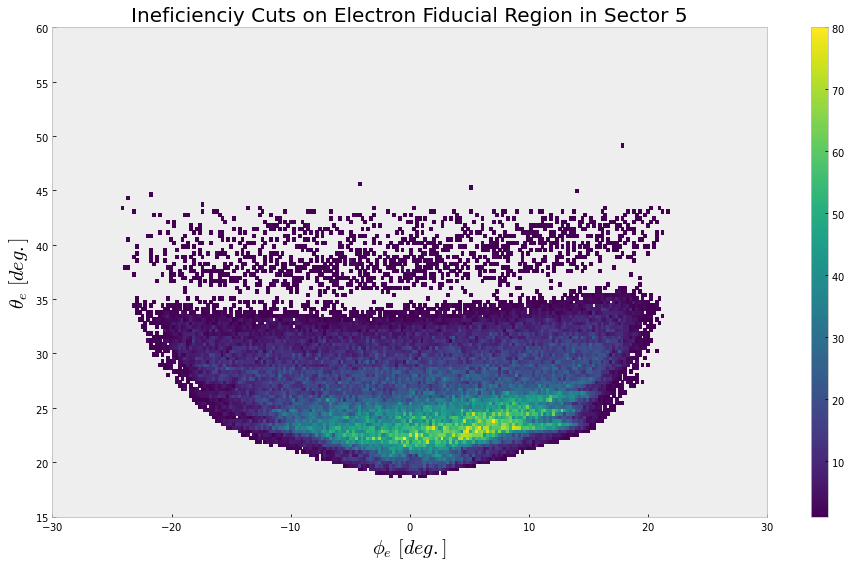

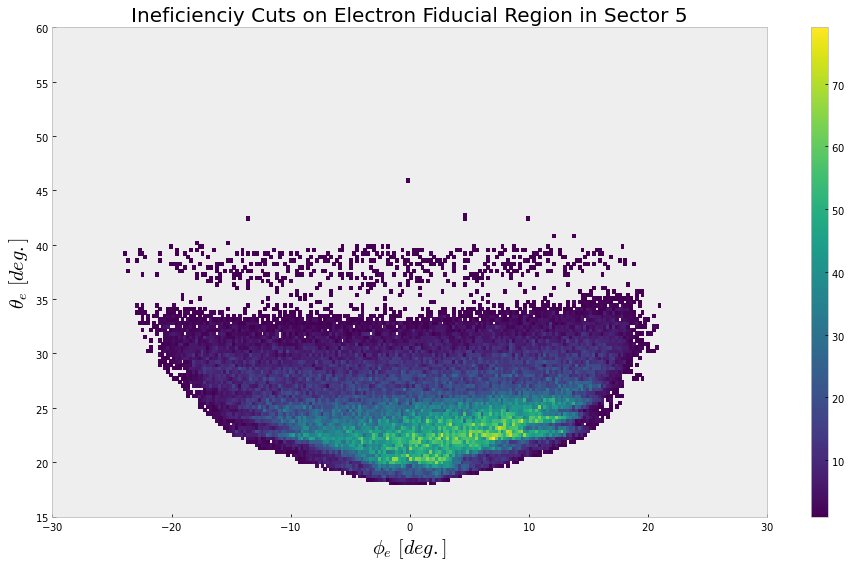

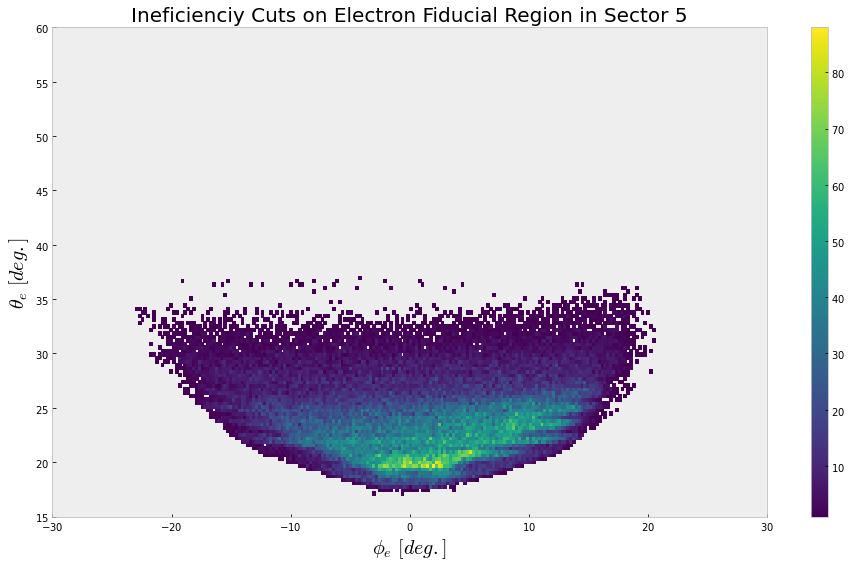

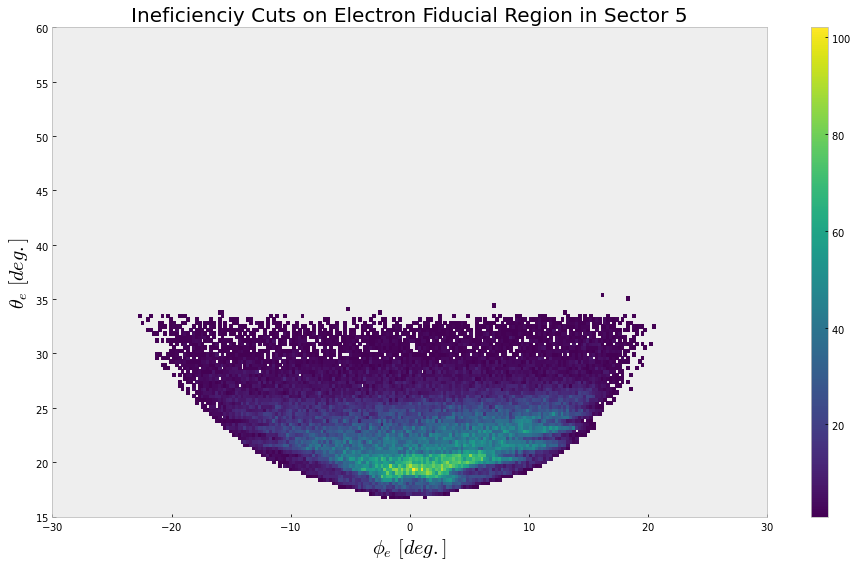

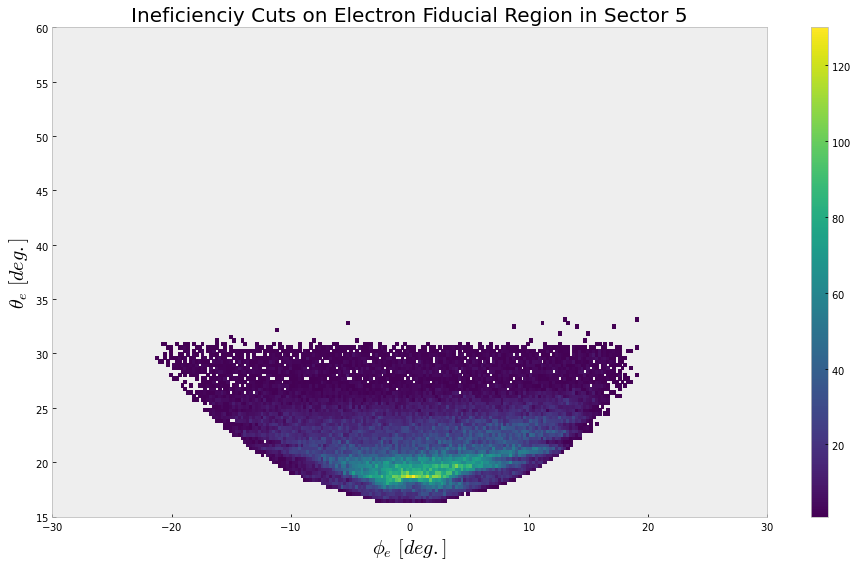

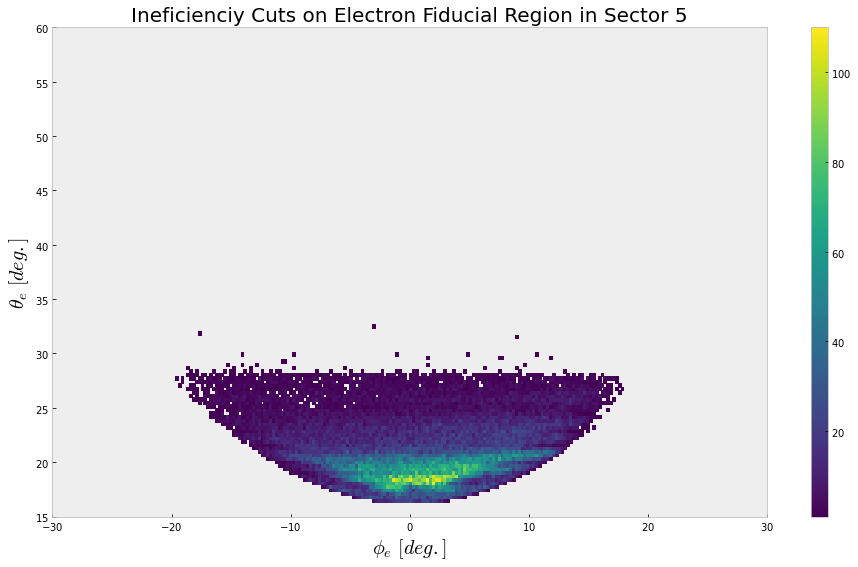

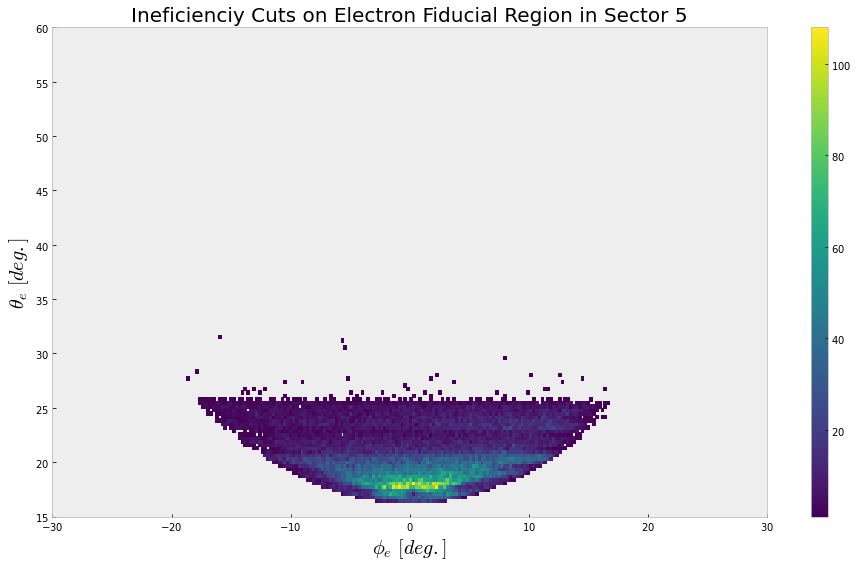

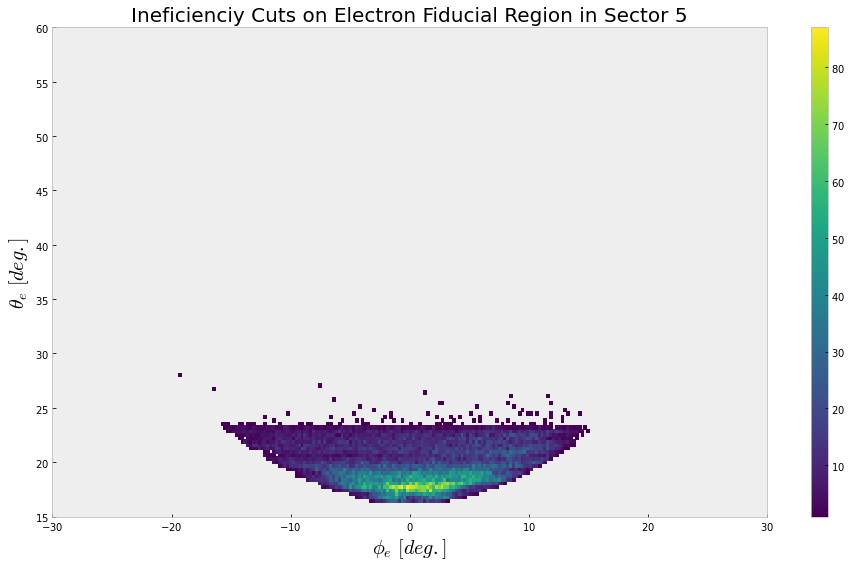

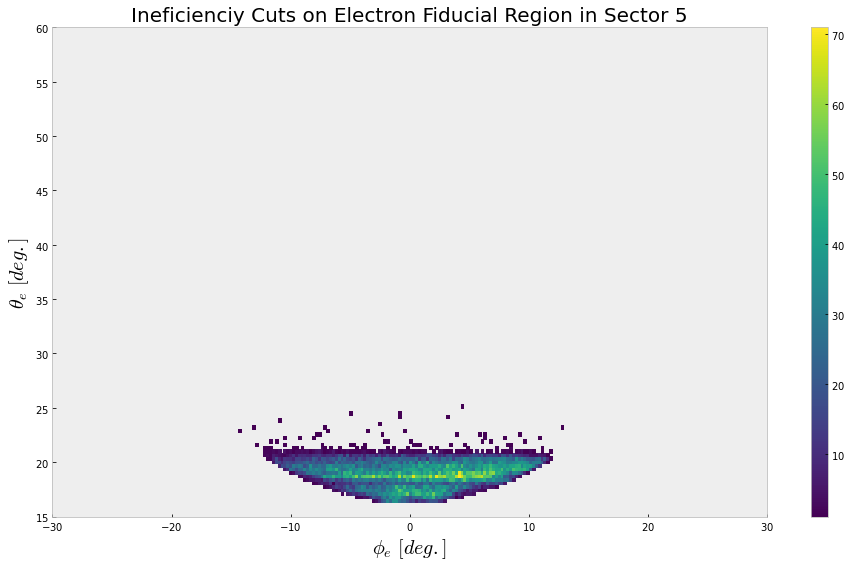

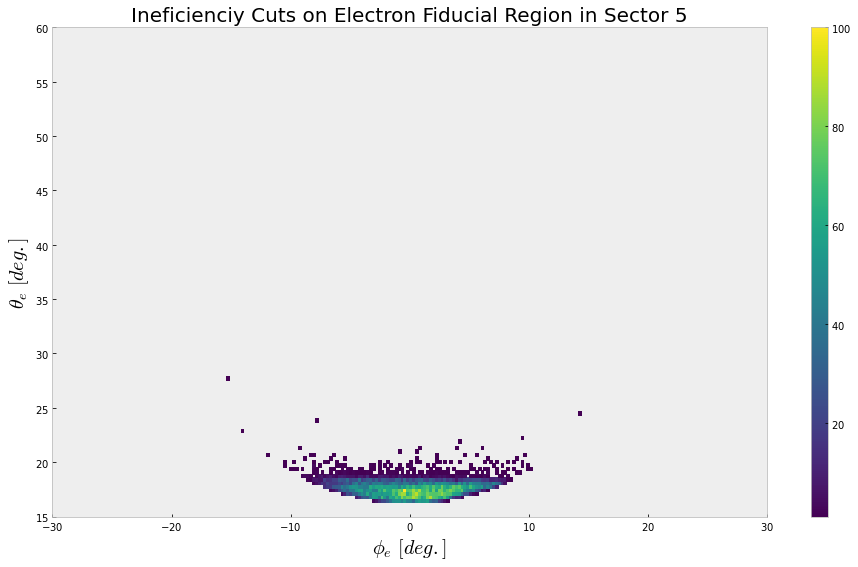

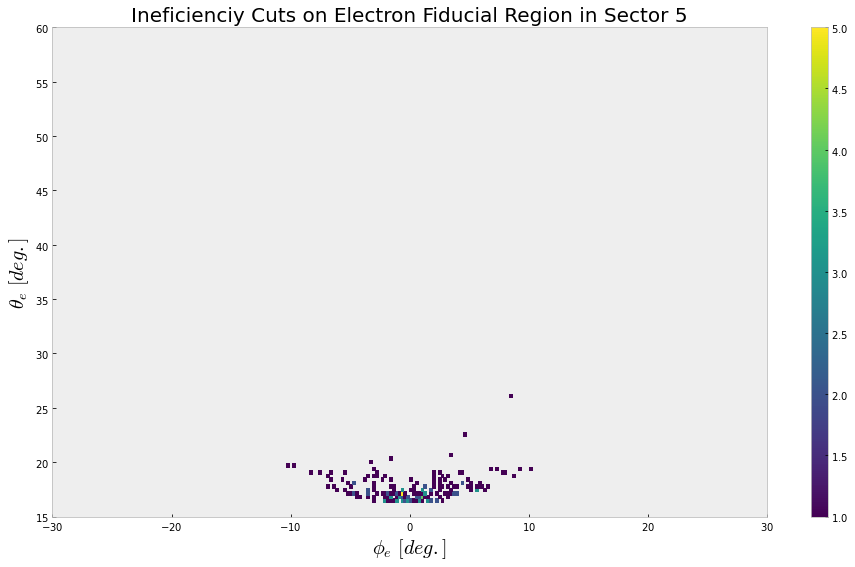

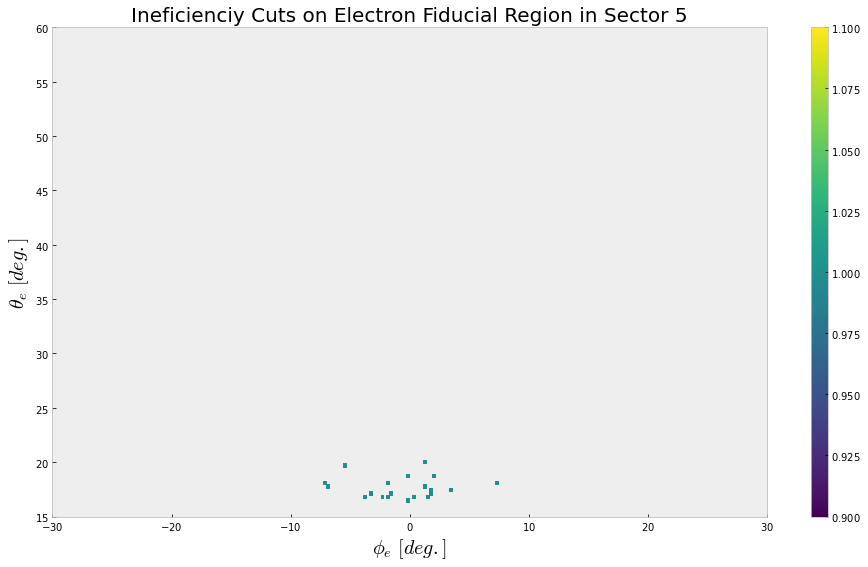

In [12]:
sec = 5
_df = df[df.e_sector == sec]

ps = np.linspace(-30, 30, len(_df))

width = 0.2
momentums = np.arange(0.2, 22, width)
for mom in momentums:
    __df = _df[(_df.e_p > mom) & (_df.e_p <= mom+width)]
    if len(__df) < 5:
        continue
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[16,9])
    epphitheta = Hist2D(xdata=np.rad2deg(__df.e_phi)+center_phi[sec], ydata=np.rad2deg(__df.e_theta), 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,80])
    epphitheta.plot(ax, density=False, zeros=False)

    ax.set_ylim(15,60)

    plt.title("Ineficienciy Cuts on Electron Fiducial Region in Sector 5")
    plt.xlabel("$\phi_e~[deg.]$")
    plt.ylabel("$\\theta_e~[deg.]$")

    plt.show()